Jack Tillman
Physics 5300
Double Pendulum Notebook

Before we go through the details of solving the equations of a double pendulum, let's first examine what they
actually are. Here, we'll consider the Lagrangian formulation as a means of deriving the 2 pendulums' equations
of motion. 

Let's first visualize the double pendulum itself. It can be seen in the following image

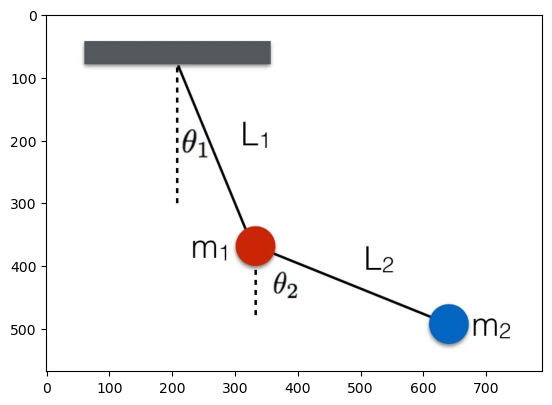

In [1]:
import matplotlib.image as mping
import matplotlib.pyplot as plt
image = mping.imread("Double_Pendulum_Image.png")
plt.imshow(image)
plt.show()

From here, we can now choose which coordinates we will want to analyze this system in. Once we have those, we can determine the kinetic and potential energies of each of the masses. From there, we can formulate the Lagrangian and work through the algorithm associated with Lagrangian mechanics (applying the differential equations) to derive the equations of motion for each mass. Once those are established, all we have to do is numerically solve.  

Let's now figure out which coordinates we'll analyze this system in. Here, we'll analyze this in Cartesian coordinates, with some constraints placed due to the fixed length of the 2 pendulums. 

For mass 1, we see:
$$
x_1 = L_1 sin(\theta_1) \\
y_1 = - L_1 cos(\theta_1)
$$
For mass 2, we see:
$$
x_2 = L_1 sin(\theta_1) + L_2 sin(\theta_2) \\
y_2 = - L_1 cos(\theta_1) - L_2 cos(\theta_2)
$$

Let's now take time derivatives of each component for mass 1 and 2 as this will be useful when we determine the kinetic energies of each of the masses:

For mass 1:
$$
\dot{x_1} = \dot{\theta_1} L_1 cos(\theta_1) \\
\dot{y_1} = \dot{\theta_1} L_1 sin(\theta_1)
$$

For mass 2:
$$
\dot{x_2} = L_1 \dot{\theta_1} cos(\theta_1) + L_2 \dot{\theta_2} cos(\theta_2) \\
\dot{y_2} = L_1 \dot{\theta_1} sin(\theta_1) + L_2 \dot{\theta_2} sin(\theta_2)
$$

From here, we can note that the Lagrangian is defined as:
$$
\mathcal{L} = T - U
$$
Where:
$$
T \equiv Kinetic \ Energy \\
U \equiv Potential \ Energy
$$

The equations of motion for each coordinate are then found by applying the Euler Lagrange Equations, which are:
$$
\frac{\partial \mathcal{L}}{\partial q_i} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{q_i}}
$$

Here, we see that $q_i \in [\theta_1, \theta_2]$

Our goal now is to find the kinetic and potential energies for each of the masses. Since the potential is much more simple in our choice of coordinates, we'll start with that. 

For each mass, the potential energy is simply the gravitational potential energy. Therefore we can write:
$$
U_1 = m_1 \ g \ y_1 = - m_1 \ g \ L_1 \ cos(\theta_1) \\
U_2 = m_2 \ g \ y_2 = - m_2 \ g \ (L_1 \ cos(\theta_1) + L_2 \ cos(\theta_2))
$$

$$
U_{total} = U_1 + U_2 = -(m_1 + m_2) \ g \ L_1 \ cos(\theta_1) - m_2 \ g \ L_2 \ cos(\theta_2)
$$  

We can now focus on the kinetic energy for each mass. Since this depends on the square of the velocity, the algebra can become quite complicated. We'll leave the details of the simplification outside of this notebook, however, it can be done by hand. We see:
$$
T_1 = \frac{1}{2} \ m_1 \ \dot{x_1}^2 + \frac{1}{2} \ m_1 \ \dot{y_1}^2 \\ 
$$
$$
T_2 = \frac{1}{2} \ m_2 \ \dot{x_2}^2 + \frac{1}{2} \ m_2 \ \dot{y_2}^2 
$$

$$
T_{total} = T_1 + T_2 
$$
Simplified, we see:
$$
T_{total} = \frac{1}{2} \ m_1 \ L_1^2 \ \dot{\theta_1}^2 + \frac{1}{2} \ m_2 \ ( L_1^2 \ \dot{\theta_1}^2 + L_2^2 \ \dot{\theta_2}^2 + 2 \ L_1 \ L_2 \ \dot{\theta_1} \ \dot{\theta_2} \ cos(\theta_1 - \theta_2) )
$$

We can now construct our Lagrangian and apply the E - L equations for each coordinate. The Lagrangian is given by:
$$
\mathcal{L} = T_{total} - U_{total}
$$

Since we've already outlined the E - L equations, we can now apply them for each coordinate. We can note that our system has reduced to one with 2 degrees of freedom. This is because of the length constraint implemented from each pendulum. For each coordinate, we see:
$$
\theta_1: \frac{\partial \mathcal{L}}{\partial \theta_1} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\theta_1}}
$$

$$
\theta_2: \frac{\partial \mathcal{L}}{\partial \theta_2} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\theta_2}}

With these, we can solve for the equations of motion for each angle, $\ddot{\theta_1}$ & $\ddot{\theta_2}$. As we did with the simplification, we'll leave the algebraic details outside of this notebook. The results for each angle can be seen below:

$$
\ddot{\theta_1} = \frac{-g \ (2  \ m_1 + m_2) \ sin(\theta_1) - g \  m_2 \  sin(\theta_1 - 2  \ \theta_2) - 2 \  m_2 \  sin(\theta_1 - \theta_2) \  (\dot{\theta_2}^2  \ L_2 + \dot{\theta_1}^2 \  L_1 \  cos(\theta_1 - \theta_2))}{L_1 \  (2  \ m_1 + m_2 - m_2  \ cos(2  \ \theta_1 - 2 \  \theta_2))}
$$
$$
\ddot{\theta_2} = \frac{2  \ \dot{\theta_1}^2  \ L_1 \ (m_1 + m_2)  \ sin(\theta_1 - \theta_2) + g \ (m_1 + m_2) \ cos(\theta_1) + m_2  \ L_2 \  \dot{\theta_2}^2 \  cos(\theta_1 - \theta_2)}{L_2 \ (2 \  m_1 + m_2 - m_2 \  cos(2  \ \theta_1 - 2 \ \theta_2))}
$$

Although these equations may be daunting, we'll be numerically solving them. Since this is the case, we need not worry about the details of that process and will be able to let the computer handle that. From here, all we have left to do is numerically solve, so let's do that!

In [2]:
#Importing necessary python libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

In [85]:
#This class is adapted from the Jupyter Notebook "Lagrangian_pendulum.ipynb" written by Professor Furnstahl

#Creating a double pendulum class to solve the eqns of motion
class DoublePendulum:
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first simple pendulum
    L2 : float
        length of the second simple pendulum
    g : float
        gravitational acceleration at the earth's surface 
    m1 : float
        mass of the first pendulum
    m2 : float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., g=1., m1=1., m2=2.):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2

    def d_dt(self, t, doublePendulumVector):
        """
        This function initializes a vector that returns the right hand side of the differential equation in the
        markdowns above
        
        Parameters
        ----------
        t : float
            time 
        doublePendulumVector : float
            A 4-component vector with the following format:
                doublePendulumVector[0] = theta1[t]
                doublePendulumVector[1] = theta1Dot[t]
                doublePendulumVector[2] = theta2[t]
                doublePendulumVector[3] = theta2Dot[2]
            
        Returns
        -------
        
        """
        g = self.g
        m1 = self.m1
        m2 = self.m2
        L1 = self.L1
        L2 = self.L2

        theta1 = doublePendulumVector[0]
        theta1Dot = doublePendulumVector[1]

        theta2 = doublePendulumVector[2]
        theta2Dot = doublePendulumVector[3]


        theta1DDot = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - m2 * L1 * theta1Dot**2 * np.sin(2 * (theta1 - theta2)) \
                      - 2 * m2 * L2 * theta2Dot**2 * np.sin(theta1 - theta2)) / (2 * m1 * L1**2 + m2 * (L1**2 + 2 * L2**2 - 2 * L1 * L2 * np.cos(theta1 - theta2)))

        theta2DDot = (2 * np.sin(theta1 - theta2) * (m1 * L1 * theta1Dot**2 + (m1 + m2) * g * np.cos(theta1) + m2 * L2 * theta2Dot**2 * np.cos(theta1 - theta2))) \
                        / (2 * m2 * L2**2 + m1 * (L1**2 + 2 * L2**2 - 2 * L1 * L2 * np.cos(theta1 - theta2)))

        return [ theta1Dot, theta1DDot, theta2Dot, theta2DDot ]

    def solve_ode(self, t_pts, initialConditions, abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = initialConditions
        solution = solve_ivp(self.d_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method = 'RK23',
                             atol=abserr, rtol=relerr)
        theta1, theta1Dot, theta2, theta2Dot = solution.y

        return theta1, theta1Dot, theta2, theta2Dot   

In [99]:
#Now that we have our class to create and solve a double pendulum written, let's initialize one and solve for
#theta1(t) & theta2(t)

#Creating the time to solve over:
tStart = 0.0
tEnd = 200.0
deltaT = 0.001
time_pts = np.arange(tStart, tEnd, deltaT)

#Creating our masses, lengths, and gravitational strength of the pendulum:
L1 = 1.0
L2 = 1.0

g = 1.0

m1 = 1.0
m2 = 1.0

#Initializing our double pendulum
doublePendulum = DoublePendulum(L1, L2, g, m1, m2)

#Creating our initial conditions:
theta1_0 = 0.0
theta1Dot_0 = 0.0

theta2_0 = np.pi
theta2Dot_0 = 0.0

initConditions = [theta1_0, theta1Dot_0, theta2_0, theta2Dot_0]

#Solving for theta1(t) & theta2(t):
theta1, theta1Dot, theta2, theta2Dot = doublePendulum.solve_ode(time_pts, initConditions)   


In [101]:
#Now that we have theta1(t) and theta2(t), we can plot these as functions of time. 
#Plotting:
fig1 = plt.figure(1, figsize = (16, 9))
title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1= {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1 = {theta1Dot_0:.2f},$' + \
                rf' $\theta_2 = {theta2_0:.2f}$' + \
                rf'  $\dot\theta_2 = {theta2Dot_0:.2f}$'

fig1.suptitle(title, fontweight = 'bold')
ax1 = fig1.add_subplot(1, 1, 1)
ax1.scatter(time_pts, theta1, color = 'red', marker = '.', s = 2.50, label=r"$\theta_1$")
ax1.scatter(time_pts, theta2, color = 'blue', marker = '.', s = 2.50, label=r"$\theta_2$")
ax1.set_xlabel('Time')
ax1.set_ylabel('Angle')
ax1.legend()

plt.tight_layout()
plt.savefig('Angle_versus_Time_DPL.png')
plt.clf()



<Figure size 1600x900 with 0 Axes>

Now that we have a solver for the double pendulum coded, we can now demonstrate that the system is chaotic. To demonstrate this, we'll create two graphs, where each represents a double pendulum differed by a fractional amount, epsilon, in one of the initial conditions. Plotting this, we see:

C:\Users\Jaydu\AppData\Local\Temp\ipykernel_1016\1227492104.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig2.tight_layout()


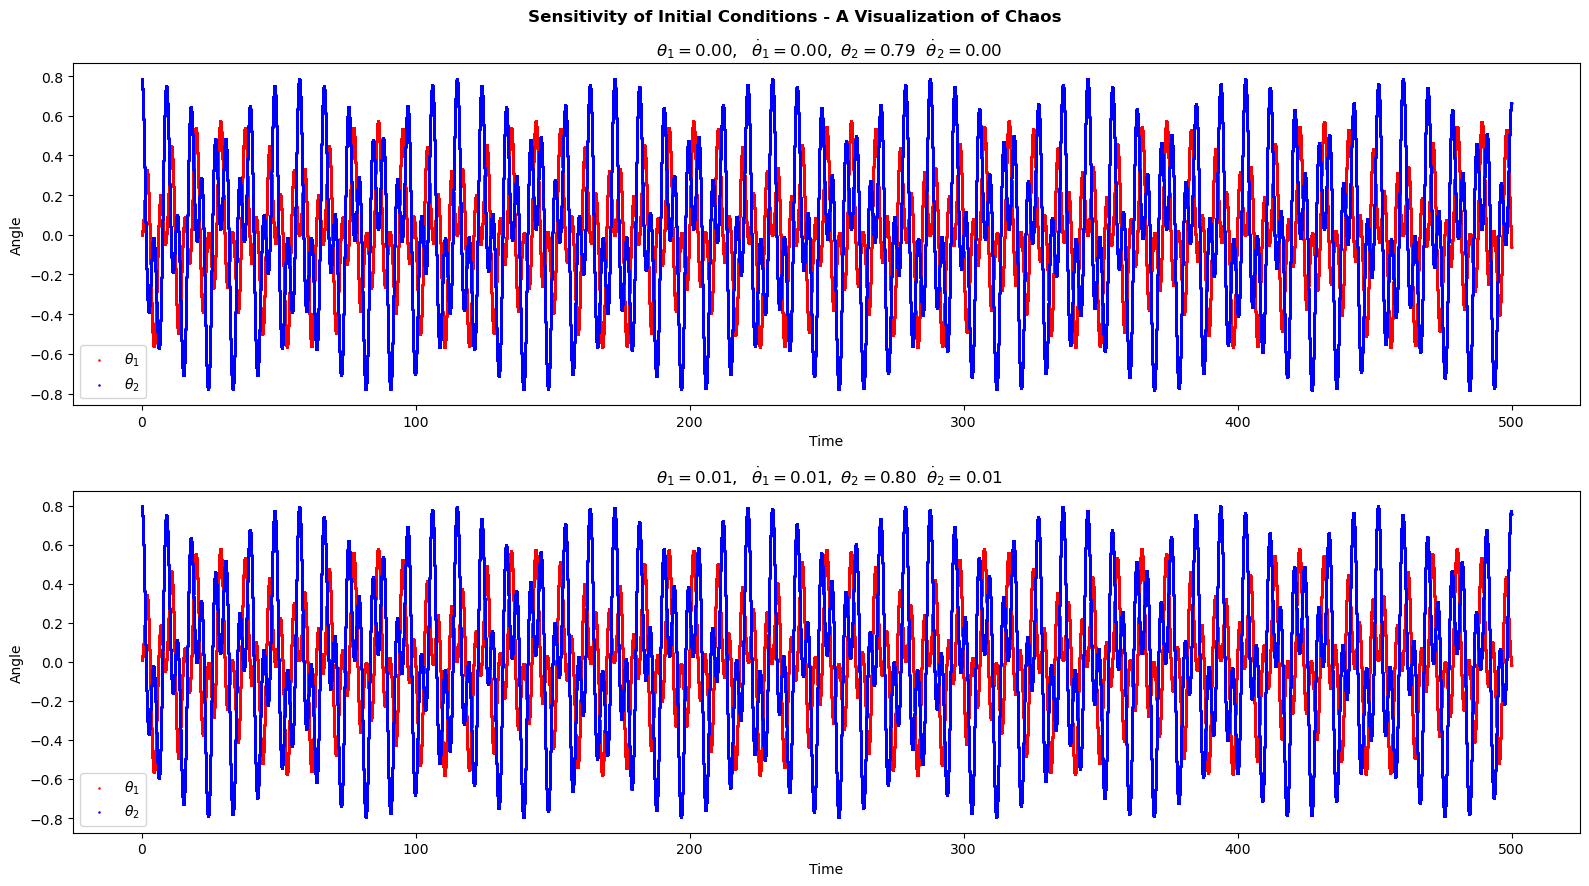

In [117]:
#Here, we'll keep the same values for the mass, length, and gravitational acceleration

#Our pendulum is then:
doublePendulum = DoublePendulum(L1, L2, g, m1, m2)

#The time of consideration is:
tStart = 0.0
tEnd = 500.0
deltaT = 0.001
time_pts = np.arange(tStart, tEnd, deltaT)

#Let's now define our fractional difference, epsilon:
epsilon = 0.01

#creating initial conditions and solving for the first pendulum:
theta1_0 = 0.0
theta1Dot_0 = 0.0

theta2_0 = np.pi / 4.0
theta2Dot_0 = 0.0

initConditions = [theta1_0, theta1Dot_0, theta2_0, theta2Dot_0]

theta1, theta1Dot, theta2, theta2Dot = doublePendulum.solve_ode(time_pts, initConditions)

#for the second pendulum (where epsilon is considered):
theta1_0E = theta1_0 + epsilon
theta1Dot_0E = theta1Dot_0 + epsilon

theta2_0E = theta2_0 + epsilon 
theta2Dot_0E = theta2Dot_0 + epsilon

initConditionsE = [theta1_0E, theta1Dot_0E, theta2_0E, theta2Dot_0E]

theta1E, theta1DotE, theta2E, theta2DotE = doublePendulum.solve_ode(time_pts, initConditionsE)

#Plotting!
fig2 = plt.figure(figsize = (16, 9))
overallTitle = 'Sensitivity of Initial Conditions - A Visualization of Chaos'

fig2.suptitle(overallTitle, fontweight = 'bold')

ax2 = fig2.add_subplot(2, 1, 1)
ax2.set_title(rf' $\theta_1= {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1 = {theta1Dot_0:.2f},$' + \
                rf' $\theta_2 = {theta2_0:.2f}$' + \
                rf'  $\dot\theta_2 = {theta2Dot_0:.2f}$')
ax2.scatter(time_pts, theta1, color = 'red', marker = '.', s = 2.50, label=r"$\theta_1$")
ax2.scatter(time_pts, theta2, color = 'blue', marker = '.', s = 2.50, label=r"$\theta_2$")
ax2.set_xlabel('Time')
ax2.set_ylabel('Angle')
ax2.legend()

ax3 = fig2.add_subplot(2, 1, 2)
ax3.set_title(rf' $\theta_1= {theta1_0E:.2f},$' + \
                rf'  $\dot\theta_1 = {theta1Dot_0E:.2f},$' + \
                rf' $\theta_2 = {theta2_0E:.2f}$' + \
                rf'  $\dot\theta_2 = {theta2Dot_0E:.2f}$')
ax3.scatter(time_pts, theta1E, color = 'red', marker = '.', s = 2.50, label=r"$\theta_1$")
ax3.scatter(time_pts, theta2E, color = 'blue', marker = '.', s = 2.50, label=r"$\theta_2$")
ax3.set_xlabel('Time')
ax3.set_ylabel('Angle')
ax3.legend()

fig2.tight_layout()
fig2.savefig("Varying_Initial_Conditions_LDP.png")
fig2.clf()


Here, we'll now take the difference between the 2 solutions and plot this on a single graph. This will allow us to visualize the chaos of the system much easier.

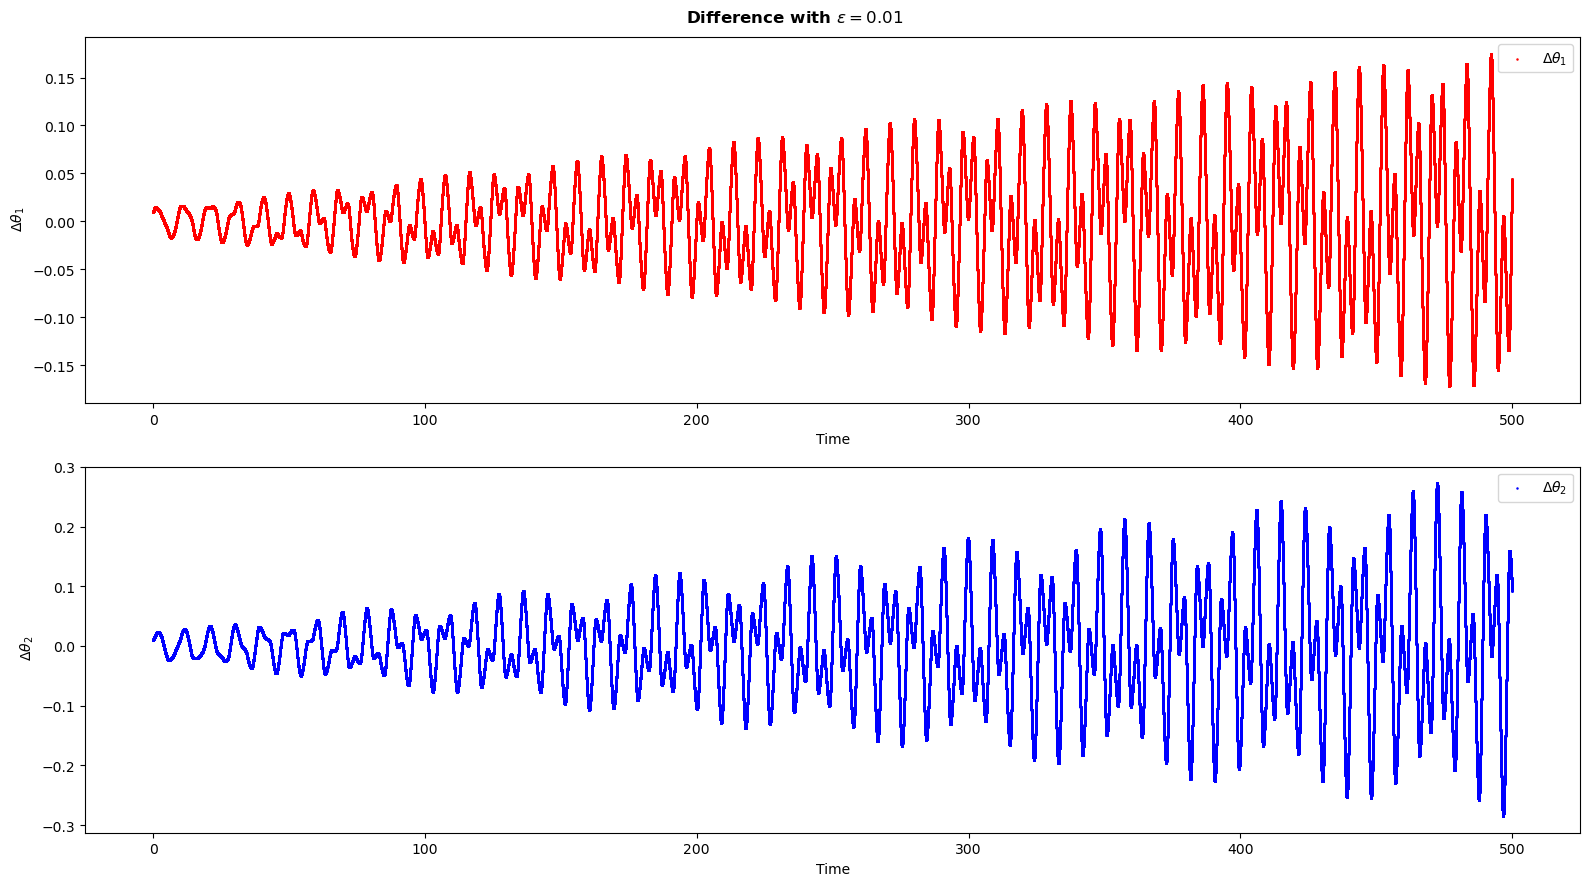

In [118]:
#Taking the difference:
deltaTheta1 = theta1E - theta1
deltaTheta2 = theta2E - theta2

#Plotting:
fig3 = plt.figure(figsize = (16, 9))
overallTitle = (rf'Difference with $\epsilon = {epsilon:0.2f}$')

fig3.suptitle(overallTitle, fontweight = 'bold')

ax4 = fig3.add_subplot(2, 1, 1)
ax4.scatter(time_pts, deltaTheta1, color = 'red', marker = '.', s = 2.50, label=r"$\Delta \theta_1$")
ax4.set_xlabel('Time')
ax4.set_ylabel(rf' $\Delta \theta_1$')
ax4.legend()

ax5 = fig3.add_subplot(2, 1, 2)
ax5.scatter(time_pts, deltaTheta2, color = 'blue', marker = '.', s = 2.50, label=r"$\Delta \theta_2$")
ax5.set_xlabel('Time')
ax5.set_ylabel(rf' $\Delta \theta_2$')
ax5.legend()

fig3.tight_layout()
fig3.savefig("Delta_Theta_Subplots.png")
fig3.clf()

